<a href="https://colab.research.google.com/github/msadeghi322/DeepLearning/blob/main/NMA_DL_W1D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1, Day 1
Here we go!

### Flattenning and Reshaping and all- testing
Two main methods of a tensor are the reshape and flatten. Reshape just changes the number of col and rows, just like matlab. flatten takes any tensor of whatever shape, and puts all the elements in a 1D tensor. Just like (:) in matlab. Importantly, the reshaping or flattening is based on counting the values from row 1, left to right, onwards.

There is a list of tensor functions that are useful. If X is a tensor:

X.reshape(i,j) --> Reshapes the tensor to i,j dimension

X.flatten() --> makes X a 1D tensor

X.squeeze() --> squeezes the tensor

X.unsqueeze()  --> reverses the squeeze function

X.permute(i,j,k)  --> reorders the dimension of X, puts the i-th dimension in 0, j-th in 1 and so on...

X.numpy()  --> converts the tensor X to numpy array. Similarly, if y is a numpy array, X = torch.tensor(y) turns it into torch.

Other useful methods:
if X is a tensor:

X.sum() --> returns the sum of all the elements \\
+  X.sum(axis=..) ---> sum across axis \\

X.mean() ---> Mean of all elements \\
+ X.mean(axis=...) ---> mean across the specified axis \\
  





### Import required packages

### playing around with tensors

In [ ]:
# Imports
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PyTorch libraries
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor


# @title Figure Settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")




In [ ]:
a = np.array([1,2,3,4])
print(a)

b = (1,2,3)
print(f'b is a tuple and its first element is {b[0]}')

c = list([1,'df',45])
print(f"c is a 'list'  and its second element is {c[1]}")

at = torch.tensor(a)
print(f'at is the tensor form of the numpy array a')

bt = torch.tensor(b)
print(bt)

d = ((1,1.2),(2,2.1))
print(f"{d} is a tuple of tuples")

e = np.ones([3,3])
print(f'numpy array of {e}')

et = torch.tensor(e)
print(et)

et2 = torch.ones([3,3])
print(f"et2 is a torch generated {et2}")

x = torch.ones(5, 3)
y = torch.zeros(2)
z = torch.empty(1, 1, 5)
print(f"Tensor x: {x}")
print(f"Tensor y: {y}")
print(f"Tensor z: {z}")



[1 2 3 4]
b is a tuple and its first element is 1
c is a 'list'  and its second element is df
at is the tensor form of the numpy array a
tensor([1, 2, 3])
((1, 1.2), (2, 2.1)) is a tuple of tuples
numpy array of [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
et2 is a torch generated tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Tensor x: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Tensor y: tensor([0., 0.])
Tensor z: tensor([[[-1.0628e+19,  4.3233e-41,  1.0336e-13,  3.2587e-41,  4.4842e-44]]])


Notice that empty just generates seemingly random numbers, but these are actually just memory allocation. It is faster to use empty if you just want to create a tensor.

### Set the seed for random number generators
When generating random numbers, there are different seeds that need to be set for reproducibility. For example, torch needs a separate seed, and np a separate one too. when working with np and torch together, the following function could be used to set the seed for all at once:

In [ ]:
def set_seed(seed=None, seed_torch=True):
  """
  Function that controls randomness. NumPy and random modules must be imported.

  Args:
    seed : Integer
      A non-negative integer that defines the random state. Default is `None`.
    seed_torch : Boolean
      If `True` sets the random seed for pytorch tensors, so pytorch module
      must be imported. Default is `True`.

  Returns:
    Nothing.
  """
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')

Random seed 0 has been set.


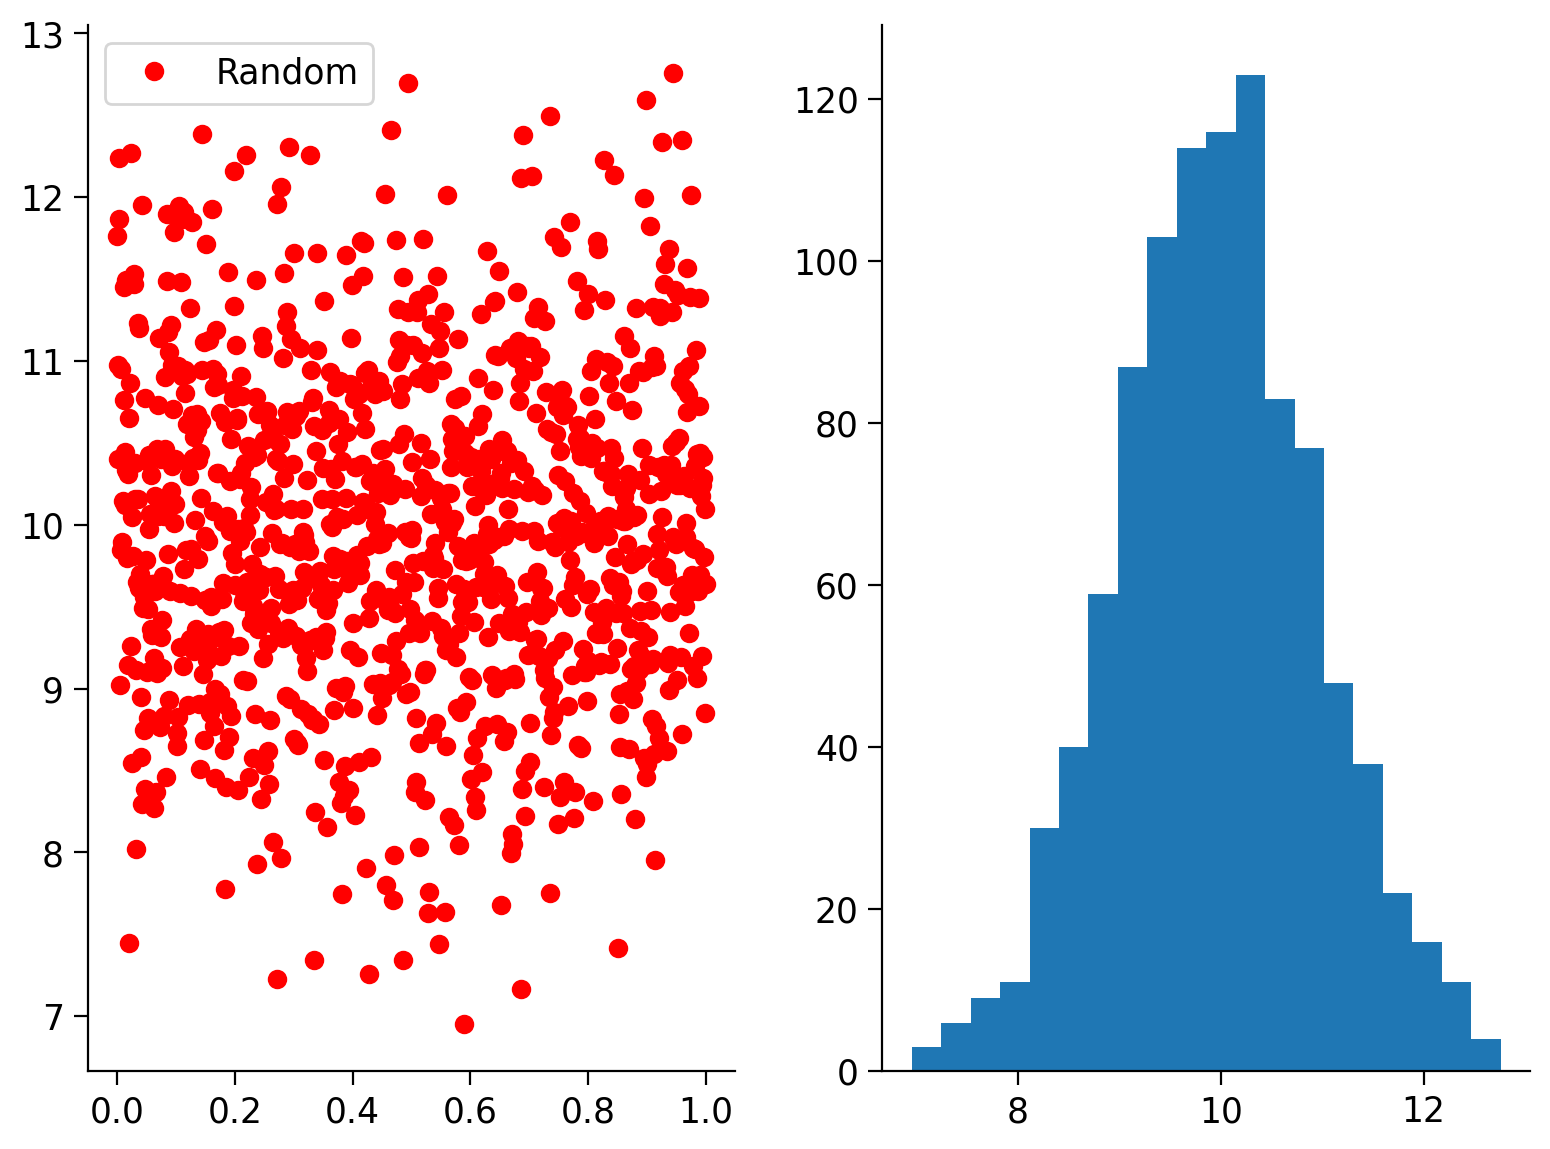

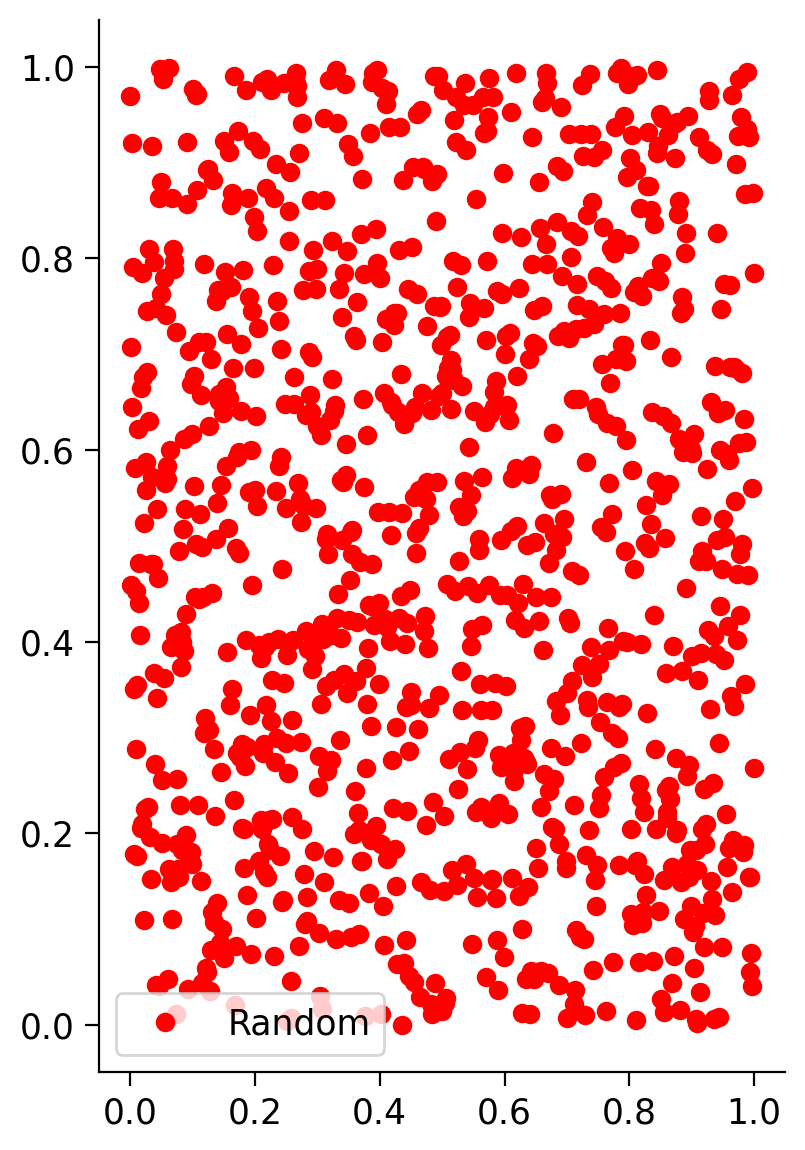

In [ ]:
set_seed(0)
a = np.random.normal(10,1,[1000,1])
t = np.linspace(0,1,len(a))
plt.figure(1)
plt.subplot(1,2,1)
plt.plot(t,a,'ro', label='Random')
plt.legend()

plt.subplot(1,2,2)
plt.hist(a,20)

plt.show()



at = torch.rand_like(torch.tensor(a))
tt = torch.tensor(t);
plt.figure(2)
plt.subplot(1,2,1)
plt.plot(tt,at,'ro', label='Random')
plt.legend()
plt.show()

#print(a)

In [ ]:
A = np.linspace(0,1,num=10)
B = np.arange(0,1,step=.1)
print(f"{A} and {B}")

At = torch.linspace(0,1,steps=10)
Bt = torch.arange(0,1,step=.2)
print(f"{At} and {Bt}")


[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] and [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000]) and tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000])


### Exercise 1: generating tensors



In [ ]:
from numpy.core.fromnumeric import transpose
# Define a function for generating tensors given a numpy array
def tensor_generator01(Z=np.random.normal(0,1,[3,5])):
    A = torch.ones([20,21])
    B = torch.empty_like(torch.tensor(Z))
    C = torch.rand_like(A)
    D = torch.arange(4,41,step=2)

    return Z, A, B, C, D


# Generate a numpy array
Z = np.zeros([3,4])
Zt, At, Bt, Ct, Dt = tensor_generator01(Z)
print(Zt)


a = .5*torch.randn([3,4])+1
b = torch.ones_like(a)
d = torch.empty_like(a)
torch.add(a,b,out=d)
print(f'd={d} is the output')

e = (a+b)@torch.t(a-b)
f = torch.matmul(e,a)
print(f'e is {e}')
print(f'f is {f}')
print(f"the first row of f = {f[0,:]}")

g = torch.dot(e[:,1],f[:,0])
print(f"the dot prod of e and f is {g}")
print(f"the mult of all e lements are {e[1,:].prod()}")
print(f'size of e = {e.size()} and size of a = {a.size()}')

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
d=tensor([[1.9361, 2.1062, 2.4311, 1.6464],
        [1.9020, 2.0499, 2.2582, 1.0032],
        [1.5297, 1.4686, 2.2966, 2.6540]]) is the output
e is tensor([[ 0.5659, -1.0984, -0.2320],
        [ 0.7150, -0.5013, -0.6580],
        [ 0.1099, -2.1294,  0.9169]])
f is tensor([[-0.5839, -0.6359, -0.8730, -0.0215],
        [-0.1314, -0.0436, -0.4606, -0.6277],
        [-1.3321, -1.6844, -1.3331,  1.5809]])
the first row of f = tensor([-0.5839, -0.6359, -0.8730, -0.0215])
the dot prod of e and f is 3.5437347888946533
the mult of all e lements are 0.23581156134605408
size of e = torch.Size([3, 3]) and size of a = torch.Size([3, 4])


In [ ]:
X = torch.randn([3,5])
Y = torch.rand([5,1])
Z = torch.matmul(X,Y)
print(f'Matrix multiplication of X and Y is:\n Z = {Z.sum(axis=1)}')
""" Note that Z is still a 2D tensor, although it looks 1D. This is important
mainly in dot products between two vectors. torch only does dot prod on 1D"""

# Create another vector like Z (therefore 2D)
E = torch.rand_like(Z)
print(f'E={E}')
print(f'Shape of E = {E.size()}')
print(f'{E.mean(axis=1)}')

EZprod = torch.dot(E.mean(axis=1),Z.mean(axis=1))

print(f'The dot product = {EZprod}')
print(f'******************************\n')
print(E.shape)


Matrix multiplication of X and Y is:
 Z = tensor([ 1.4690, -0.1337, -0.6458])
E=tensor([[0.4212],
        [0.3440],
        [0.4603]])
Shape of E = torch.Size([3, 1])
tensor([0.4212, 0.3440, 0.4603])
The dot product = 0.2754581868648529
******************************

torch.Size([3, 1])


In [ ]:
X = torch.rand([2,3])
print(f'X={X}\n')
Y = X.reshape(3,2)
print(f'Y={Y}\n')
Z = X.flatten()
print(f'Z={Z}\n')

# If A is a 1D tensor, then A[i] means the i-th element.
# If A is more than 1D, then A[i] means all the elements in row i, and A[i][j] means the element in row i and col j.
# Note1:  A[i][j] is equivalent to A[i,j].
# Note2:  for an N dimensional tensor A, A[i] is a N-1 dim tensor that only includes the i-th row.

A = torch.rand(1,10)
print(f'A={A},\n A[]={A[0,:]}\n')
print(f'Squeezing A: {A.squeeze()}\n')


B = torch.rand(2,4)
C = torch.randn(2,4)
D = torch.cat((B,C),dim=0)
print(f'Concatinate rows: {D}\n')
print(f'Concatinate cols: {torch.cat((B,C),dim=1)}')





X=tensor([[0.0643, 0.0414, 0.7149],
        [0.4433, 0.1984, 0.4873]])

Y=tensor([[0.0643, 0.0414],
        [0.7149, 0.4433],
        [0.1984, 0.4873]])

Z=tensor([0.0643, 0.0414, 0.7149, 0.4433, 0.1984, 0.4873])

A=tensor([[0.0436, 0.6327, 0.7375, 0.9849, 0.0927, 0.4394, 0.7713, 0.9582, 0.1443,
         0.7125]]),
 A[]=tensor([0.0436, 0.6327, 0.7375, 0.9849, 0.0927, 0.4394, 0.7713, 0.9582, 0.1443,
        0.7125])

Squeezing A: tensor([0.0436, 0.6327, 0.7375, 0.9849, 0.0927, 0.4394, 0.7713, 0.9582, 0.1443,
        0.7125])

Concatinate rows: tensor([[ 0.7064,  0.8014,  0.1553,  0.8568],
        [ 0.2822,  0.1922,  0.5993,  0.9236],
        [ 1.4447, -0.7415,  1.0057,  1.0977],
        [ 1.0344,  0.4029, -1.4230,  0.4872]])

Concatinate cols: tensor([[ 0.7064,  0.8014,  0.1553,  0.8568,  1.4447, -0.7415,  1.0057,  1.0977],
        [ 0.2822,  0.1922,  0.5993,  0.9236,  1.0344,  0.4029, -1.4230,  0.4872]])


In [ ]:
A = torch.arange(0,10,step=1)
print(f'A = {A} \n')
print(f'{A[:]} \n')
print(f'{A[-2]} \n')
print(f'{A.reshape(2,5)} \n')
print(f'{A.shape} \n')
print(f'{A.view(2,5)} \n')




A = tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

8 

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]) 

torch.Size([10]) 

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]) 



In [ ]:
def functionA(A: torch.Tensor , B):
  # This function takes in two 2D tensors 𝐴 and 𝐵 and returns the column sum of
  # A multiplied by the sum of all the elmements of 𝐵, i.e., a scalar.

  C = A.sum(axis=0)*B.sum()
  return C, A.sum(axis=0), B.sum()


def functionB(A: torch.Tensor):
  # This funciton receives a square tensor A, flattens it, and makes a new 2D
  # tensor with the flattened A as one column and the index of A elements in the other column

  x = A.flatten().unsqueeze(1)     # because x is 1D, we add a second singleton dimension for concatination
  i = torch.arange(0,len(x)).unsqueeze(1)
  Y = torch.cat((i,x), dim=1)
  return x, i, Y


def functionC(A: torch.Tensor, B: torch.Tensor):
  # if dimensions allow, reshape B to size A, and pointwise sum them. otherwise, flatten both and concatinate
  if torch.numel(A)==torch.numel(B):
    C = A + B.reshape(A.shape)
  else:
    a = A.flatten()
    b = B.flatten()
    C = torch.cat([a,b],axis=0)

  return C


print(torch.cuda.is_available())
A = torch.rand(3,3)
x,i,C = functionB(A)
#X, I, Y = functionB(A)
print(f'A = {A} \n X={x}\n C={C} \n\n')


A = torch.rand(4,5)
B = torch.rand(2,4)
C = functionC(A,B)
print(f'C={C}\n')




X = torch.rand([3,4])
Y = torch.randn([2,7])
Z, Xs, Bs = functionA(X,Y)
print(f'Xs = {Xs}\n Bs = {Bs} \n Z={Z}')

print(f'\n {torch.cuda.is_available()}')
print(X.device)
X.cuda()
Y = torch.tensor([[2,3,4], [3 ,4, 5]], device="cuda")
print(Y.device)
print(X.cuda())

Y=Y.to("cpu")
print(Y.device)
Y = torch.rand([3,2])
print(Y)


True
A = tensor([[0.7281, 0.0055, 0.8441],
        [0.1145, 0.4919, 0.6026],
        [0.6973, 0.1897, 0.5673]]) 
 X=tensor([[0.7281],
        [0.0055],
        [0.8441],
        [0.1145],
        [0.4919],
        [0.6026],
        [0.6973],
        [0.1897],
        [0.5673]])
 C=tensor([[0.0000e+00, 7.2805e-01],
        [1.0000e+00, 5.4797e-03],
        [2.0000e+00, 8.4409e-01],
        [3.0000e+00, 1.1446e-01],
        [4.0000e+00, 4.9195e-01],
        [5.0000e+00, 6.0264e-01],
        [6.0000e+00, 6.9730e-01],
        [7.0000e+00, 1.8967e-01],
        [8.0000e+00, 5.6729e-01]]) 


C=tensor([0.7153, 0.9289, 0.1237, 0.2514, 0.6457, 0.4839, 0.1626, 0.0792, 0.0560,
        0.1501, 0.2871, 0.1528, 0.0614, 0.5390, 0.7932, 0.2643, 0.5500, 0.4938,
        0.7337, 0.1532, 0.5237, 0.9667, 0.8570, 0.0044, 0.4247, 0.5047, 0.3349,
        0.1715])

Xs = tensor([1.0065, 1.6708, 1.3656, 2.0401])
 Bs = -0.9989150762557983 
 Z=tensor([-1.0054, -1.6690, -1.3641, -2.0379])

 True
cpu
cuda:0
tensor([[

### Testing the speed of GPU vs CPU

In [ ]:
import time

def speedtest(dim, device):
  x = torch.rand([dim,dim]).to(device)
  y = torch.rand([dim,dim]).to(device)
  z = torch.ones([dim,dim]).to(device)+2
  a = x*y
  b = torch.matmul(x,z)

  del x
  del y
  del z
  del a
  del b


dim = 10000
DEVICE="cuda"
St = time.time()
speedtest(dim, DEVICE)
En = time.time()
print(f'Time = {En-St}')

A = torch.rand(3,4)
print(A)
print(torch.matmul(A.T,A))
print(torch.dot(A[:,0],A[:,1]))

Time = 4.580076217651367
tensor([[0.9542, 0.6121, 0.0366, 0.8422],
        [0.2601, 0.9416, 0.6227, 0.9592],
        [0.8214, 0.8469, 0.7887, 0.7026]])
tensor([[1.6529, 1.5246, 0.8448, 1.6302],
        [1.5246, 1.9784, 1.2767, 2.0137],
        [0.8448, 1.2767, 1.0112, 1.1823],
        [1.6302, 2.0137, 1.1823, 2.1230]])
tensor(1.5246)


## Datasets and Data Loader


In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Grayscale

In [ ]:
# Download and load CIFAR10 images: 10 class of color images with 6000 images per class

cifar10_data = datasets.CIFAR10(
    root="data",
    download=True,
    transform=ToTensor()
    )
print(f'The number of samples in the cifar data is = {len(cifar10_data)}')
print(f"Different classes in the dataset = {cifar10_data.classes}")

100%|██████████| 170498071/170498071 [00:14<00:00, 12176034.11it/s]


Extracting data/cifar-10-python.tar.gz to data
The number of samples in the cifar data is = 50000
Different classes in the dataset = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


torch.Size([3, 32, 32])


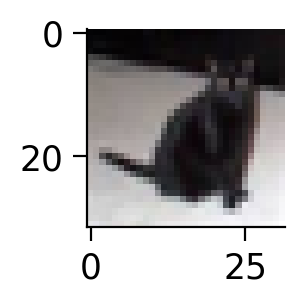

In [ ]:
import matplotlib.pyplot as plt

#random.seed(2021)
image, label = cifar10_data[random.randint(0, len(cifar10_data))]
#print(cifar10_data[0])
print(image.shape)
image = image.permute(1,2,0)
plt.subplot(4,4,1)
plt.imshow(image)


In [ ]:
# Decompose into train and test
train_data =  datasets.CIFAR10(
    root="data",
    train = True,
    download=True,
    transform=ToTensor()
    )
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download = True,
    transform=ToTensor()
    )

Files already downloaded and verified
Files already downloaded and verified


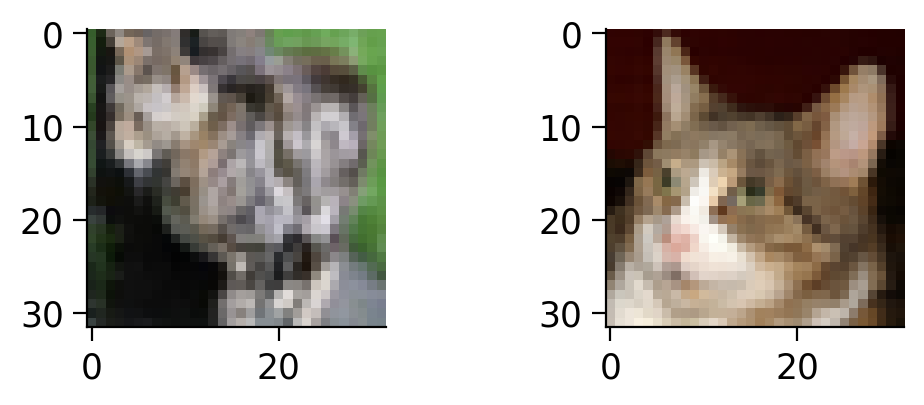

In [ ]:
image,label = train_data[random.randint(0,1000)]
im2, lbl2 = test_data[random.randint(0,1000)]
image = image.permute(1,2,0)
im2 = im2.permute(1,2,0)
plt.figure()
plt.subplot(3,3,1)
plt.imshow(image)
plt.subplot(3,3,2)
plt.imshow(im2)

In [ ]:
import numpy
# setting the seed for reproducibility
def seed_worker(worker_id):
  worker_seed = torch.initial_seed() % 2**32
  numpy.random.seed(worker_seed)
  random.seed(worker_seed)

my_seed = 2023
g_seed = torch.Generator()
g_seed.manual_seed(my_seed)

# Data loader takes the data and splits it into batches
train_dataloader = DataLoader(
    train_data,
    batch_size=64,
    num_workers = 20,
    worker_init_fn=seed_worker,
    generator=g_seed)

test_dataloader = DataLoader(
    test_data,
    batch_size=64,
    num_workers = 20,
    worker_init_fn=seed_worker,
    generator=g_seed)



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


The DataLoader basically splits the data into batches, and hence, the new data set will have 4 dimensions, Batch * ColorChannel * H * W.\\

We can now query the next batch from the data loader and inspect it. For this we need to convert the dataloader object to a Python iterator using the function iter and then we can query the next batch using the function next.




torch.Size([64, 3, 32, 32])
tensor([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6,
        2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2,
        2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2])


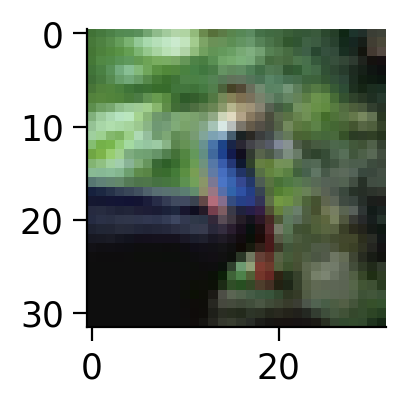

In [ ]:
batch_image,batch_label = next(iter(train_dataloader))
print(batch_image.shape)
print(batch_label)

plt.subplot(3,3,1)
plt.imshow(batch_image[63].permute(1,2,0))

Files already downloaded and verified


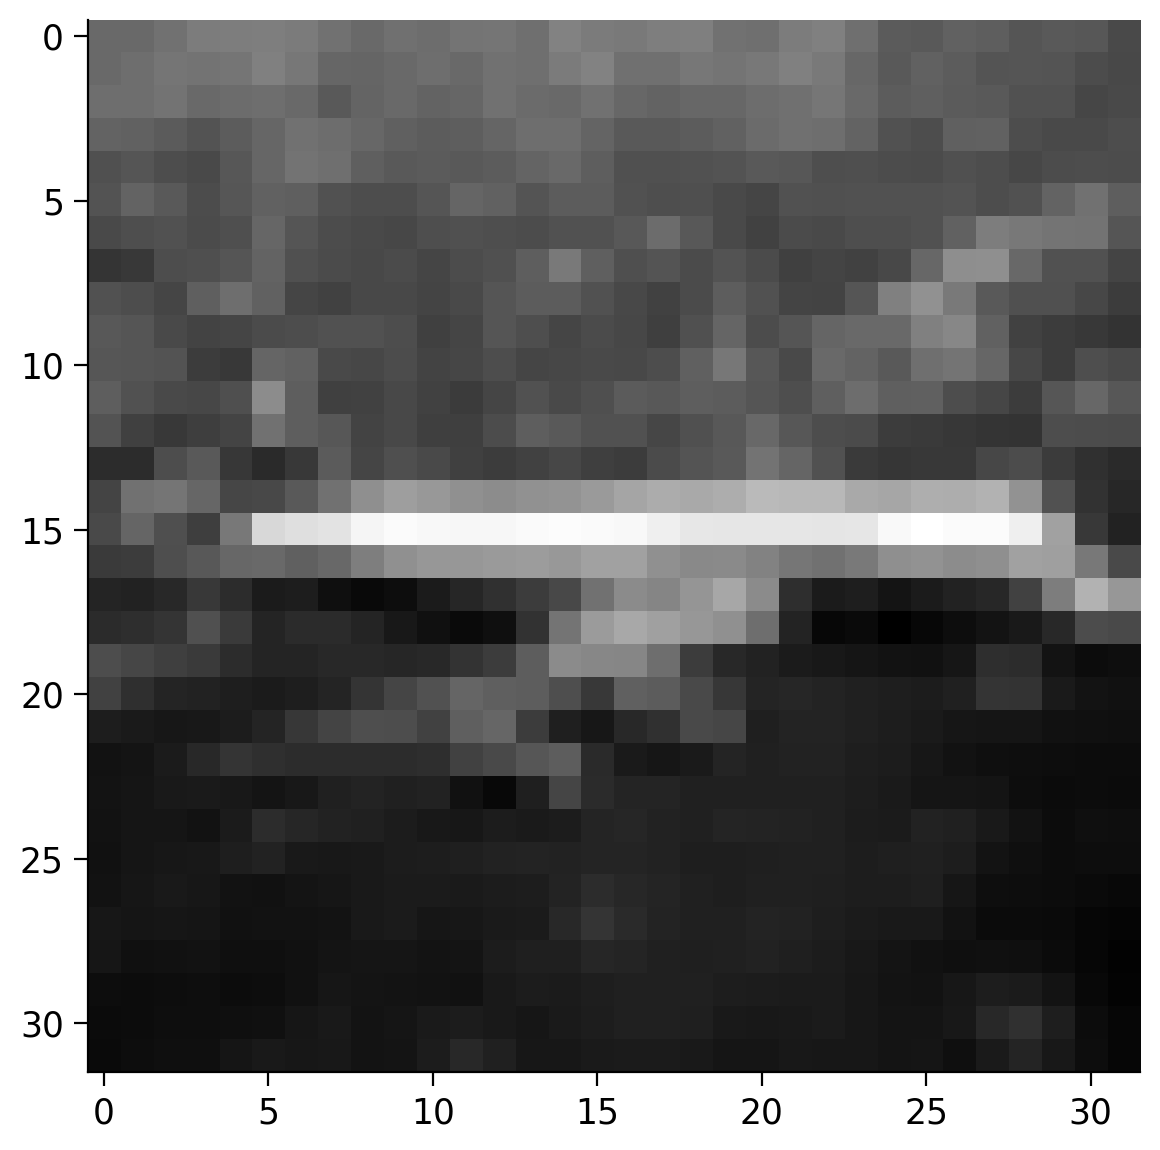

In [ ]:
def my_data_load():
  """
  Function to load CIFAR10 data as grayscale images

  Args:
    None

  Returns:
    data: DataFrame
      CIFAR10 loaded Dataframe of shape (3309, 14)
  """
  ###############################################
  ## TODO for students: load the CIFAR10 data,
  ## but as grayscale images and not as RGB colored.
  #raise NotImplementedError("Student exercise: fill in the missing code to load the data")
  ###############################################
  ## TODO Load the CIFAR10 data using a transform that converts the images to grayscale tensors
  data = datasets.CIFAR10(root="data",
                          download=True,
                          train=True,
                          transform=Compose([ToTensor(),Grayscale()]) )
  # Display a random grayscale image
  image, label = data[random.randint(0, len(data))]
  plt.imshow(image.squeeze(), cmap="gray")
  plt.show()

  return data


## After implementing the above code, uncomment the following lines to test your code
data = my_data_load()

## Reading from CSV files to train a neural network
Here we first use a dataset that is available online, turn it into csv file, and then start working on the csv file to practice data loading and training the NN. \\
Pandas package is used for data handling (reading, writing etc). We use it here for csv creation and loading.

In [ ]:
from sklearn.datasets import make_moons

# Creata dataset of 256 points with a little noise
X, y = make_moons(256, noise=.1)

# Use pandas to creat csv. we turn the data into a dict, which is turned into data frame using pd package.
df = pd.DataFrame(dict(x0=X[:,0], x1=X[:,1], y=y))
df.to_csv('sample_data.csv')


### Load the data from the created csv file

size of y = (256,)


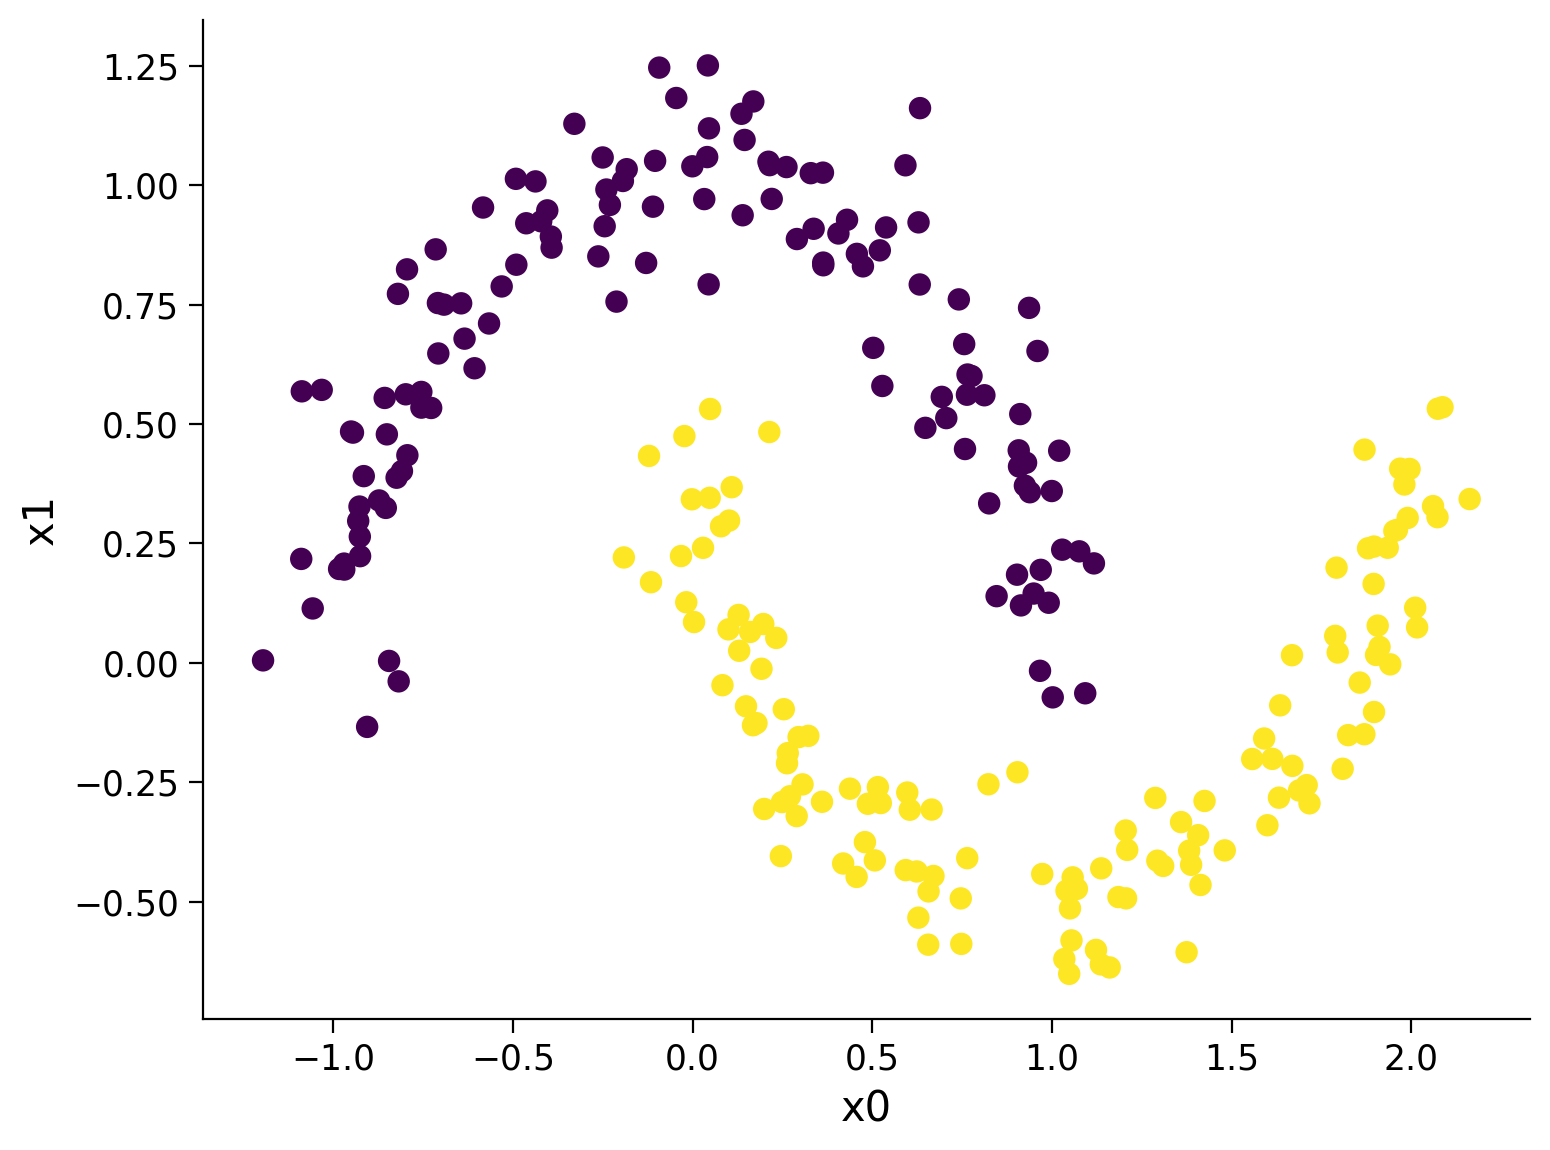

In [ ]:
data = pd.read_csv("sample_data.csv")

# As an exmaple, print the x1 column of data
#print(data['x1'])


# Create a 2D numpy array from x0 and x1
X_orig = data[["x0","x1"]].to_numpy()
y_orig = data["y"].to_numpy()
print(f"size of y = {y_orig.shape}")

# Visualize data
plt.scatter(X_orig[:,0],X_orig[:,1],s=50, c=y_orig)
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()


### Prepare data for Pytorch: convert everything to tensors

In [ ]:
def set_device():
  """
  Set the device. CUDA if available, CPU otherwise

  Args:
    None

  Returns:
    Nothing
  """
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("GPU is not enabled in this notebook. \n"
          "If you want to enable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `GPU` from the dropdown menu")
  else:
    print("GPU is enabled in this notebook. \n"
          "If you want to disable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `None` from the dropdown menu")

  return device

In [ ]:
# Initialize device variable
DEVICE = set_device()

# convert 2D points to tensor
X = torch.tensor(X_orig, dtype=torch.float32)

# Upload the tensor to device (???)
X = X.to(DEVICE)
print(f"Size X:{X.shape}")

# Now the same with y: y is the labels, so convert it to long tensor for some reason
y = torch.from_numpy(y_orig).type(torch.LongTensor)

# upload to device
y = y.to(DEVICE)



GPU is enabled in this notebook. 
If you want to disable it, in the menu under `Runtime` -> 
`Hardware accelerator.` and select `None` from the dropdown menu
Size X:torch.Size([256, 2])


## Now build a neural net
torch provides a template class for NN that we use to build our NNs. It involves certain important methods (functions) as follows: \\
`__init__`: This is to initialize the type and structure of the NN. \\
`forward(x)`: when the structure and layers of NN are built, the forward function simply runs the input data, x, through the layers and spits out the output, which is usually a score. \\
`predict(x)`: This is another function that turns the output from the `forward` fucntion into probability, and returns the label with highest probability. In other words, it takes the score output and determines which lable that score represents most. \\


All of the funcitons above run based on a build network with random parameters (default parameters). The NN could be trained to find the best parameters to classify the data. So a `train()` function is also present in the NN class.

In [ ]:
# @title The NN module (a template like class provided by torch) { run: "auto" }
# Inherit from nn.Module - the base class for neural network modules provided by Pytorch
class NaiveNet(nn.Module):
  """
  NaiveNet architecture
  Structure is as follows:
  Linear Layer (2, 16) -> ReLU activation -> Linear Layer (16, 2)
  """
  # Define the structure of your network
  def __init__(self):
    """
    Defines the NaiveNet structure by initialising following attributes
    nn.Linear (2, 16):  Transformation from the input to the hidden layer
    nn.ReLU: Activation function (ReLU) is a non-linearity which is widely used because it reduces computation.
             The function returns 0 if it receives any negative input, but for any positive value x, it returns that value back.
    nn.Linear (16, 2): Transformation from the hidden to the output layer

    Args:
      None

    Returns:
      Nothing
    """
    super(NaiveNet, self).__init__()
    self.midlayerneurons = 20

    # The network is defined as a sequence of operations
    self.layers = nn.Sequential(
        nn.Linear(2, self.midlayerneurons),
        nn.ReLU(),
        #nn.Linear(self.midlayerneurons, self.midlayerneurons),
        #nn.ReLU(),
        nn.Linear(self.midlayerneurons, 2),
    )

  # Specify the computations performed on the data
  def forward(self, x):
    """
    Defines the forward pass through the above defined structure

    Args:
      x: torch.Tensor
        Input tensor of size ([3])

    Returns:
      layers: nn.module
        Initialised Layers in order to re-use the same layer for each forward pass of data you make.
    """
    # Pass the data through the layers
    return self.layers(x)

  # Choose the most likely label predicted by the network
  def predict(self, x):
    """
    Performs the prediction task of the network

    Args:
      x: torch.Tensor
        Input tensor of size ([3])

    Returns:
      Most likely class i.e., Label with the highest score
    """
    # Pass the data through the networks
    output = self.forward(x)

    # Choose the label with the highest score
    return torch.argmax(output, 1)

  # Train the neural network (will be implemented later)
  def train(self, X, y):
    """
    Training the Neural Network

    Args:
      X: torch.Tensor
        Input data
      y: torch.Tensor
        Class Labels/Targets

    Returns:
      Nothing
    """
    pass

### Now given the NN Class, build a NN

In [ ]:
# build a nn and send it to the gpu- All defined variables should be sent to
# the Device in which the computations happen
model = NaiveNet().to(DEVICE)

# print the model:
print(model)

NaiveNet(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=2, bias=True)
  )
)


In [ ]:
# @title
# Now testing the NN

# The data: we already have X as data samples. let's pick a few of the samples
X_samples = X[:5];
print(X_samples)

Output = model.forward(X_samples)
print(Output)

PredOut = model.predict(X_samples)
print(PredOut)


tensor([[ 0.3288,  1.0252],
        [ 0.1296,  0.0252],
        [ 0.3600, -0.2911],
        [ 2.0605,  0.3280],
        [-0.9452,  0.4820]], device='cuda:0')
tensor([[ 0.2188,  0.2568],
        [ 0.0445,  0.3319],
        [-0.0253,  0.3715],
        [ 0.0575,  0.4641],
        [ 0.1383,  0.1171]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([1, 1, 1, 1, 0], device='cuda:0')


In [ ]:
# @title Helper function to plot the decision boundary

# Code adapted from this notebook: https://jonchar.net/notebooks/Artificial-Neural-Network-with-Keras/

from pathlib import Path

def plot_decision_boundary(model, X, y, device):
  """
  Helper function to plot decision boundary

  Args:
    model: nn.module
      NaiveNet instance
    X: torch.tensor
      Input CIFAR10 data
    y: torch.tensor
      Class Labels/Targets
    device: String
      "cpu" or "cuda"

  Returns:
    Nothing
  """
  # Transfer the data to the CPU
  X = X.cpu().numpy()
  y = y.cpu().numpy()

  # Check if the frames folder exists and create it if needed
  frames_path = Path("frames")
  if not frames_path.exists():
    frames_path.mkdir()

  # Set min and max values and give it some padding
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  h = 0.01

  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Predict the function value for the whole gid
  grid_points = np.c_[xx.ravel(), yy.ravel()]
  grid_points = torch.from_numpy(grid_points).type(torch.FloatTensor)
  Z = model.predict(grid_points.to(device)).cpu().numpy()
  Z = Z.reshape(xx.shape)

  # Plot the contour and training examples
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)


In [ ]:
# @title A function to train the NN { run: "auto" }
# Implement the train function given a training dataset X and correcsponding labels y
def train(model, X, y):
  """
    Training the Neural Network

    Args:
      X: torch.Tensor
        Input data
      y: torch.Tensor
        Class Labels/Targets

    Returns:
      losses: Float
        Cross Entropy Loss; Cross-entropy builds upon the idea of entropy
        from information theory and calculates the number of bits required
        to represent or transmit an average event from one distribution
        compared to another distribution.
    """
  # The Cross Entropy Loss is suitable for classification problems
  loss_function = nn.CrossEntropyLoss()

  # Create an optimizer (Stochastic Gradient Descent) that will be used to train the network
  learning_rate = 1e-2
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # Number of epochs
  epochs = 15000

  # List of losses for visualization
  losses = []

  for i in range(epochs):
    # Pass the data through the network and compute the loss
    # We'll use the whole dataset during the training instead of using batches
    # in to order to keep the code simple for now.
    y_logits = model.forward(X)
    loss = loss_function(y_logits, y)

    # Clear the previous gradients and compute the new ones
    optimizer.zero_grad()
    loss.backward()

    # Adapt the weights of the network
    optimizer.step()

    # Store the loss
    losses.append(loss.item())

    # Print the results at every 1000th epoch
    if i % 1000 == 0:
      print(f"Epoch {i} loss is {loss.item()}")

      plot_decision_boundary(model, X, y, DEVICE)
      plt.savefig('frames/{:05d}.png'.format(i))

  return losses




Epoch 0 loss is 0.7544870972633362
Epoch 1000 loss is 0.27703186869621277
Epoch 2000 loss is 0.24450908601284027
Epoch 3000 loss is 0.23523835837841034
Epoch 4000 loss is 0.2281726449728012
Epoch 5000 loss is 0.22050799429416656
Epoch 6000 loss is 0.21154794096946716
Epoch 7000 loss is 0.2014201581478119
Epoch 8000 loss is 0.1897483915090561
Epoch 9000 loss is 0.17648141086101532
Epoch 10000 loss is 0.16216431558132172
Epoch 11000 loss is 0.14730510115623474
Epoch 12000 loss is 0.13257448375225067
Epoch 13000 loss is 0.11855291575193405
Epoch 14000 loss is 0.10563641041517258


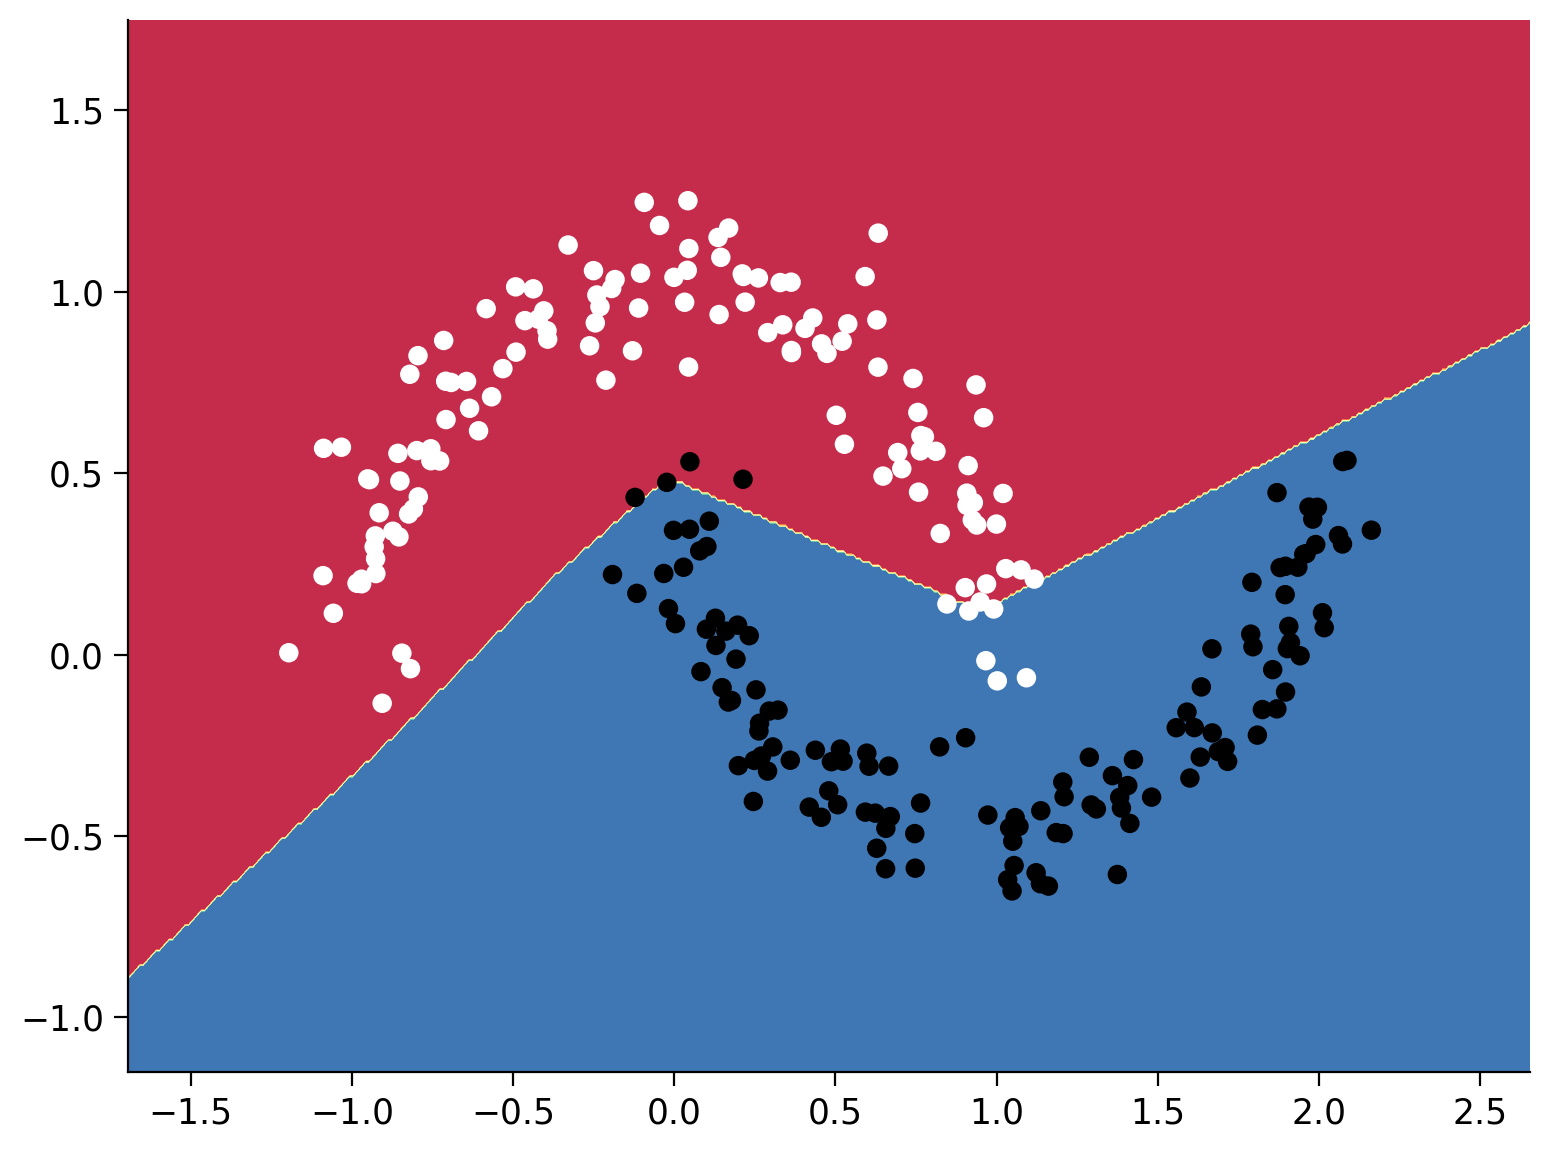

In [ ]:
# Create a new network instance a train it
model = NaiveNet().to(DEVICE)
losses = train(model, X, y)

### Plot the loss during training


Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

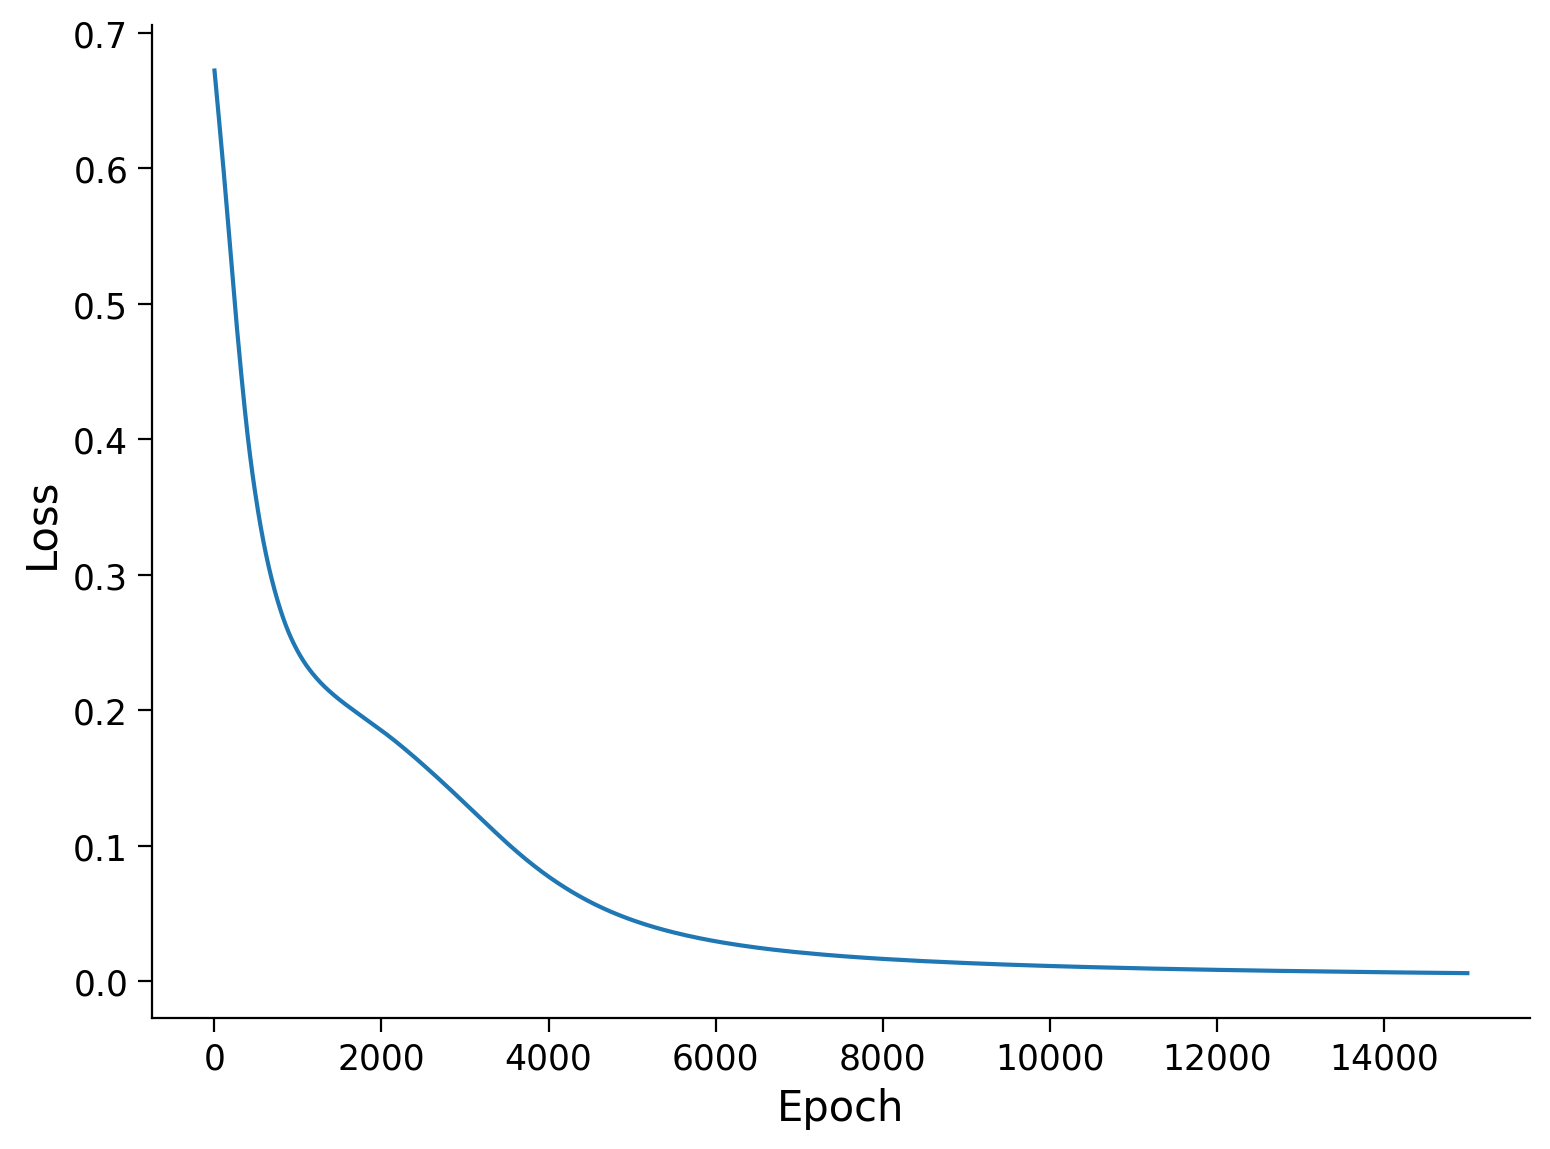

In [ ]:
plt.plot(np.linspace(1, len(losses), len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

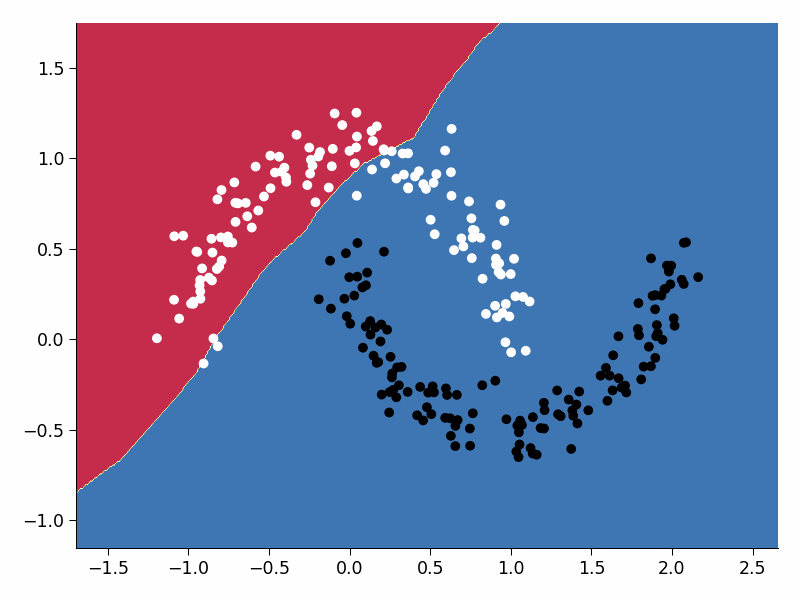

In [ ]:
# @title Visualize the training process
# @markdown Execute this cell!
!pip install imageio --quiet
!pip install pathlib --quiet

import imageio.v2 as imageio
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Image, display
from pathlib import Path

InteractiveShell.ast_node_interactivity = "all"

# Make a list with all images
images = []
for i in range(10):
  filename = Path("frames/0"+str(i)+"000.png")
  images.append(imageio.imread(filename))
# Save the gif
imageio.mimsave('frames/movie.gif', images)
gifPath = Path("frames/movie.gif")
with open(gifPath,'rb') as f:
  display(Image(data=f.read(), format='png'))